In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('/Users/songzhao/Code Playground/xl/account_statement_hanmei.csv')
df.head()

,Type,Product,Started Date,Completed Date,Description,Amount,Fee,Currency,State,Balance
0,TRANSFER,Current,2024-10-27 18:22:04,2024-10-27 18:22:04,From ZHEYUAN HE,200.00,0.0,SEK,COMPLETED,200.00
1,TRANSFER,Current,2024-10-27 18:23:41,2024-10-27 18:23:42,From ZHEYUAN HE,20.00,0.0,SEK,COMPLETED,220.00
2,TRANSFER,Current,2024-10-27 18:38:15,2024-10-27 18:38:16,To ZHEYUAN HE,-220.00,0.0,SEK,COMPLETED,0.00
3,TRANSFER,Current,2024-10-27 18:47:52,2024-10-27 18:47:52,From ZHEYUAN HE,100.00,0.0,SEK,COMPLETED,100.00
4,FEE,Current,2024-10-27 19:51:31,2024-10-27 19:51:31,Card Delivery Fee,-89.99,0.0,SEK,COMPLETED,10.01


In [69]:
df = df.drop(columns=['Product', 'Fee', 'Currency', 'State'])

In [70]:
df[df['Description']=='Hallonbergen']

,Type,Started Date,Completed Date,Description,Amount,Balance
50,CARD_PAYMENT,2024-12-03 10:48:23,2024-12-04 09:54:51,Hallonbergen,-152.25,2685.52
56,CARD_PAYMENT,2024-12-11 12:00:43,2024-12-12 15:59:51,Hallonbergen,-211.25,1365.23


In [71]:
df['Type'].value_counts()

Type
CARD_PAYMENT    64
TRANSFER        16
REWARD           2
FEE              1
Name: count, dtype: int64

In [72]:
df.head()

,Type,Started Date,Completed Date,Description,Amount,Balance
0,TRANSFER,2024-10-27 18:22:04,2024-10-27 18:22:04,From ZHEYUAN HE,200.00,200.00
1,TRANSFER,2024-10-27 18:23:41,2024-10-27 18:23:42,From ZHEYUAN HE,20.00,220.00
2,TRANSFER,2024-10-27 18:38:15,2024-10-27 18:38:16,To ZHEYUAN HE,-220.00,0.00
3,TRANSFER,2024-10-27 18:47:52,2024-10-27 18:47:52,From ZHEYUAN HE,100.00,100.00
4,FEE,2024-10-27 19:51:31,2024-10-27 19:51:31,Card Delivery Fee,-89.99,10.01


In [73]:
df_desc = df[['Description', 'Amount']]

In [74]:
df_desc_group = df_desc.groupby('Description').sum()

In [75]:
df_desc_group = df_desc_group[df_desc_group['Amount'] < 0]

In [76]:
df_desc_group = df_desc_group.reset_index()

In [78]:
df_desc_group['Type'] = ['Food', 'Daily', 'Other', 'Daily',
                         'Daily', 'Daily', 'Clothes', 'Daily',
                         'Food', 'Daily', 'Daily', 'Food',
                         'Food', 'Food', 'Food', 'Daily',
                         'Food', 'Food', 'Food', 'Daily',
                         'Food', 'Other', 'Clothes', 'Clothes',
                         'Food', 'Transfer', 'Transfer', 'Transfer',
                         'Transfer','Transfer', 'Daily', 'Clothes']

In [ ]:
df_temp = df_desc_group.groupby('Type').sum()

In [83]:
df_temp

,Description,Amount
Type,,
Clothes,H&MSolna centrumStadiumÅhléns,-1226.49
Daily,Asian MarketClas OhlsonCoopCostcoHallonbergenH...,-4213.74
Food,7-ElevenHao KokIKEAIr Livs AbKina MurenKista S...,-1581.52
Other,Card Delivery FeeSANIBOX,-99.99
Transfer,To LEYI YINTo SONG ZHAOTo Song ZTo YANGTAO CHE...,-5130.00


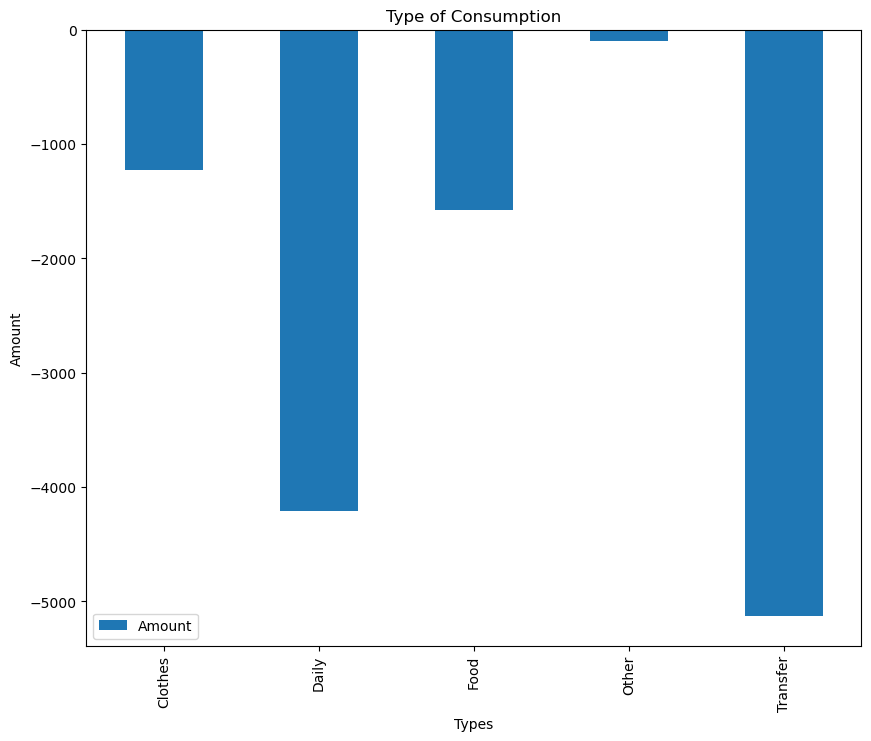

In [82]:
df_temp.plot(kind='bar',
             figsize=(10,8),
             title='Type of Consumption',
             xlabel='Types',
             ylabel='Amount')
plt.show()